# The influence of healthcare spending on life expectancy
## An essay by Frank Kloosterman & Jochem Vlug
Studentnumbers: 4373863 & 4165993

![Healthcare](http://northcentralhealthdistrict.org/wp-content/uploads/2017/07/Coalition-banner.jpg)

## 1. Introduction

One of the Sustainable Development Goals of the United Nations is “Ensure healthy lives and promote wellbeing for all at all ages” (Guterres, 2018). This goal sounds vague, but aims at preventing needless suffering from preventable diseases and preventing many people of dying prematurely. The United Nations aim for a healthy life for every person in the world and thereby increasing the life expectation of the citizens of the world. 

For western countries means increasing your life expectancy to live a better life, stop smoking, have your daily vitamins and maintain a healthy weight. However, in many countries many people die from curable diseases due to poor health care. We would like to find out until what extent you can buy a longer life expectancy. In this report, a data analysis has been conducted on the status of healthcare around the world. Using data from three datasets, we try to answer our research question:


*"What is the relation between life expectancy and healthcare spending?"*

We define healthcare spending with two different variables, out-of-pocket healthcare spending of an houshold per capita and capital expenses by government per capita. Besides healthcare expenses we also explore the relations between GDP and life expectancy to see if this relations of life expectancy differs from the relations with healthcare expenses. With that relation we can check if households and governments spend relatively much on healthcare. Finally, we estimate future life expectancy and health expenses based on the datasets to see how the variables and their relations evolve.  

In order to anwser the main research question we formulated the following sub questions:
- What is the relation between out-of-pocket healthcare spending per household and the life expactancy?
- What is the relation between healthcare spending by government and life expectancy?
- What is the relation between GDP and life expectancy?
- How do these variables and their relations evolve over the coming 10 years, based on 15 years of data?

We have devided this document in the following chapters.
- Chapter 1: Introduction
- Chapter 2: Preperation of data transformation
- Chapter 3: Transforming the data and overview of the transformed data from 2000 till 2015
- Chapter 4: Relations between variables
- Chapter 5: Prediction of variables and their relations
- Chapter 6: Conclusion

This is an interactive report, which is written in Jupyter Notebook, using the markdown language and Python for programming the data. This report was made as a final assignment for the course Computer Engineering for Scientific Computing (EPA1333).

# 2. Preperation of data transformation
## 2.1 Packages

To be able read the datasets, apply mathematical operations to the data, plot graphs and execute many more operations we use libraries made by the community using packages. First, we import these packages using the block below. It is necessary to run this script for the functions to work.

We have used the following packages:
- NumPy: fundamental package for scientific computing with Python. In this document mainly used for N-dimensional array objects. 
- Mathplotlib: plotting libary for variety of figures. 
- Pandas: package used for analyzing, modifying and creating data in DataFrames.
- Missingno: Missing data visualization module for Python. Not integrated in Anaconda, can be found and installed at: https://github.com/ResidentMario/missingno
- Pythondebugger: Used during the modelling to debug written code. 
- Seaborn: Python data visualization library based on Mathplotlib. ALso used to draw regression lines in scatterplots. 
- SciPy: To evaluate the correlation between variables


In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd 
import missingno as msno # Missingno
import pdb # Pythondebugger
import seaborn as sns 
import scipy 


## 2.2 Datasets
The data used for our research consists of three datasets, which are loaded in the block below. These datasets are:
- Sustainable Development Goals, The World Bank. 2017. datacatalog.worldbank.org

This dataset has a very large amount of data which are related to the UN SDG's. In this dataset, we use the data that is related to the simple economical status of a country to get an idea of the welfare status of the country.
- Life Expectancy, Global Health Observatory - World Health Organisation (WHO). 2017. who.int/gho

This is a section of a much larger dataset from the WHO, gathered by using the only query tool on the WHO website. In this dataset, the average life expectancy of citizens in a country are gathered.
- Average Household Pocket Money, The World Bank. 2017. data.worldbank.org

This dataset is a collection of the average amount of "household out of pocket money" spent on healthcare. This means the amount of money an average citizen spends on healthcare from their own finances. This excludes costs for healthcare insurences.
- Capital Health Expenditure, Global Health Observatory - World Health Organisation (WHO). 2017. who.int/gho

To get an idea of the healthcare governance per country, this dataset gives an average of money spent on healthcare compare to the total amount of money spent by the government (so it is a percentage).

Some minor corrections are done to the dataset straight away, for example skipping empty rows in the dataset and choosing the right separator to parse the data in the right way.

In [2]:
# Sustainable Development Goals
SDG = pd.read_csv("https://github.com/Jochem285/EPA1333FA/raw/master/Data/SustainableDevelopmentGoals.csv")
# Life Expectancy
life_exp = pd.read_csv("https://github.com/Jochem285/EPA1333FA/raw/master/Data/LifeExpectancy.csv")
# Household pocket money. Second row is empty, so we skip it.
house_money = pd.read_excel("https://github.com/Jochem285/EPA1333FA/raw/master/Data/HouseholdPocketMoney.xlsx",skiprows=[1],index_col=0)
# Capital health expenditure. Second row is empty, so we skip it.
cap_exp = pd.read_excel("https://github.com/Jochem285/EPA1333FA/raw/master/Data/CapitalHealthExpenditure.xlsx",skiprows=[1],index_col=0)

## 2.3 Search the Data
To start using the data to get answers to our research questions, we first need to get a brief overview of its contents. First off, we make a tool that can easily scan the datasets for specific key words to check if the datasets contain these topics. This tool can later be used to track down certain variable names as well.

In [3]:
#Search world_bank database for keyphrase
def searchData(myInput):
    variableList = []
    for sentence in list(SDG["Indicator Name"].values):
        newSentence = np.array(sentence.split(" "))
        for words in (newSentence):
            if words.lower() == myInput.lower(): 
                variableList += [sentence]

    variableList = pd.unique(variableList)
    return variableList
searchData("") #insert search input here.

array(['Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care  (% of women age 15-49)'],
      dtype=object)

## 2.4 Overview of the Data
After defining our datasets, we need to get a rough overview of the completeness of the data. To check the availability of data in the datasets, we plot a matrix which shows the amount of (missing) data. We use MissingNo to make this matrix.
In the graph below, the black parts in the matrix represent data in the datasets. Moreover, this means that with spaces in the matrix represent missing values (or NaN). Getting an overview of the data is important because we need to be sure that our conclusions are valid by using enough values, and prevent researching variable which have a lot of missing values.

In the block below, the different dataframes can be "toggled" to show their matrix by removing the "#" in front of the code.

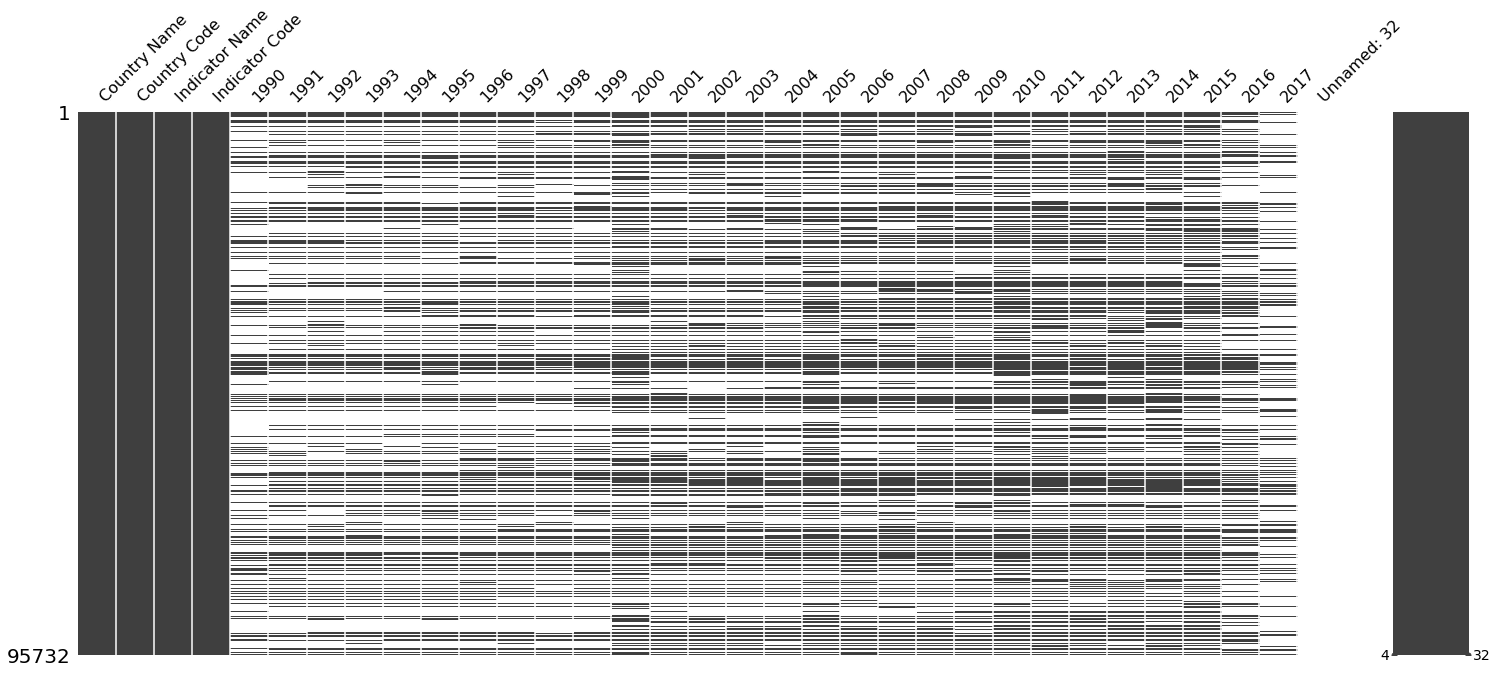

In [4]:
#First summarise status of data by making a NaN matrix.
msno.matrix(SDG.sample(len(SDG)))
#msno.matrix(life_exp.sample(len(life_exp)))
#msno.matrix(house_money.sample(len(house_money)))
#msno.matrix(cap_exp.sample(len(cap_exp)))

# 3 Transforming the Data
After establishing an overview of the data inside the datasets and defining our research goals, the transforming of the data can start. Transforming the data into a uniform structure is needed to be able to apply statistical calculations and regressions and graphical plots based on the data. In this chapter, the data is processed and selected on its purpose.

## 3.1 Finding poorest and richest countries
To get an overview, we use the 20 richest and poorest countries in the world to see if there is a relation between factors of healthcare related data. This might not entail a complete causal relation between factors, but can be used as a proper indication for certain correlations between the data.

To start with the data transforming we take the data of the SDGs and take the Country name, GDP of 2016 and GDP of 2017 of the data with the indicator 'GDP per capita, PPP (contstant 2011 international)'. We bind these columns into one dataframe, GDP_1617. Since the matrix above shows that 2017 misses a lot of data compared to earlier years, we check below whether the information about the GDP of 2016 and 2017 differ significantly.

The graph shows that the years only differ slightly, so we use the most up-to-date set: 2017.

Halfway we mask regions of china and North America, since we would like to compare complete countries rather than regions or continents. We also mask San Marino, since there is almost no data available about the country and select the countries with the highest and lowest GDP. Ofcourse, in the model process we masked the regions, continents and San Marino after we found the highest and lowest countries. These countries, without the GDP, are the output and these countries will be used in further analysis. 




In [5]:
#This section makes a Top 20 list of richest and poorest countries based on GDP per capita, PPP.
#We will use these countries in further analysis

#Define the countries and their GDP's to determine Top richest and poorest.
countries = SDG[SDG["Indicator Name"]== 'GDP per capita, PPP (constant 2011 international $)']["Country Name"]
GDP = SDG[SDG["Indicator Name"]== 'GDP per capita, PPP (constant 2011 international $)']
GDP_2016 = SDG[SDG["Indicator Name"]== 'GDP per capita, PPP (constant 2011 international $)']["2016"]
GDP_2017 = SDG[SDG["Indicator Name"]== 'GDP per capita, PPP (constant 2011 international $)']["2017"]

#Combine the country names with GDP's
GDP_1617 = countries.to_frame().join(GDP_2017.to_frame()).join(GDP_2016.to_frame())

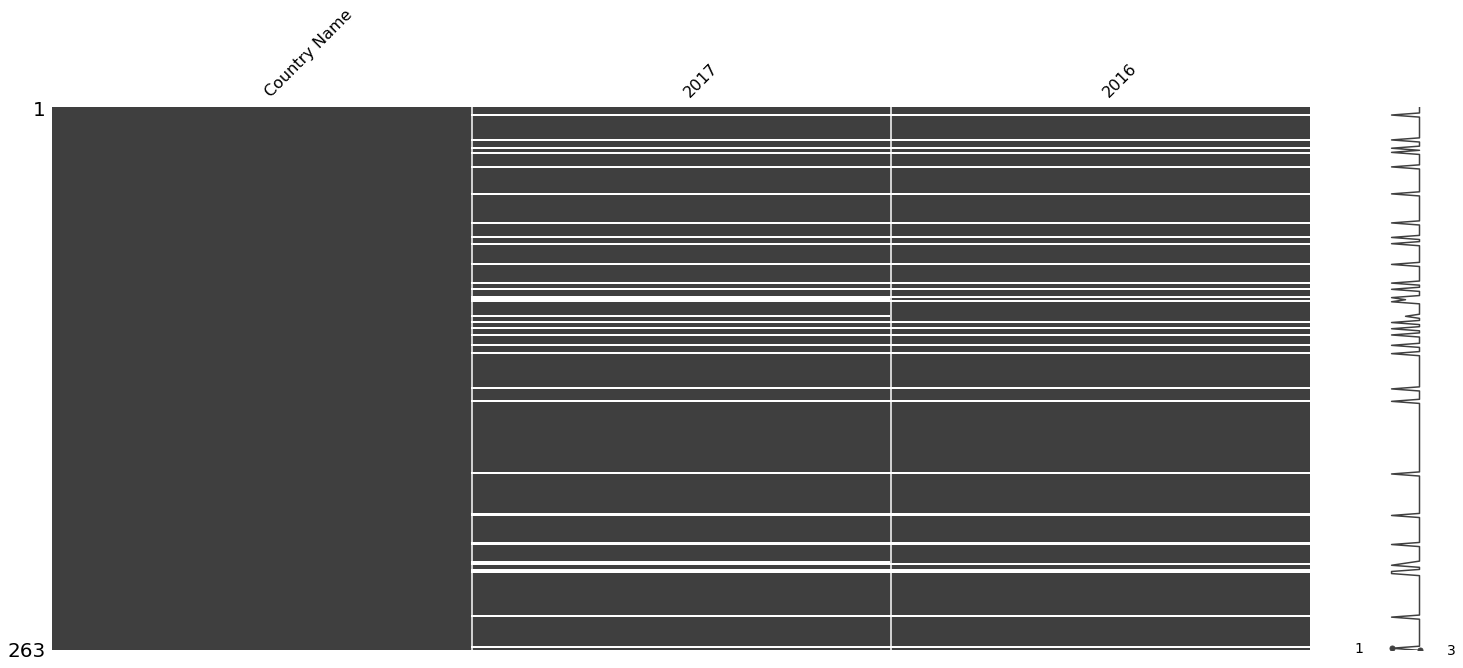

In [6]:
msno.matrix(GDP_1617.sample(len(GDP_1617)))
plt.show()

In the block below, the data that is of no use for this research is removed. For example, there are a lot of "Countries" in the data that are regions, not countries. For the sake of significance, smaller (city) states are removed as well.

After this, we define a top 20 of the richest and poorest countries on earth. This is defined by the GDP per capita of a country in 2016 and 2017 in USD($).

In [7]:
#Mask the entries in the top 20's of the list which are actually not countries.
GDP_1617 = GDP_1617.mask(GDP_1617["Country Name"]=="Macao SAR, China")
GDP_1617 = GDP_1617.mask(GDP_1617["Country Name"]=="Hong Kong SAR, China")
GDP_1617 = GDP_1617.mask(GDP_1617["Country Name"]=="North America")
GDP_1617 = GDP_1617.mask(GDP_1617["Country Name"]=="High income")
#Masked small states as well, since there is almost no data available
GDP_1617 = GDP_1617.mask(GDP_1617["Country Name"]=="San Marino")
GDP_1617 = GDP_1617.mask(GDP_1617["Country Name"]=="Brunei Darussalam")

#Define the top20's
lowest_20 = GDP_1617.sort_values("2017")[0:20]
highest_20 = GDP_1617.sort_values("2017", ascending=False)[0:20]

lowest_countries = lowest_20["Country Name"]
highest_countries = highest_20["Country Name"]
    
#Concate the highest and lowest together.
newCountries = pd.concat([lowest_countries, highest_countries])

#Set countries in alphabetic order. 
newCountries = newCountries.sort_values(ascending = True)

#To prevent errors, debug when the list does not contain 40 countries.
if len(newCountries) < 40:
    newCountries = str("Something went wrong.")
else:
    newCountries = list(newCountries.values)

## 3.2 Transforming and format different datasets
In the cells below are the countries, which were output of the cell above, put in the other dataframe about household expenses on healthcare. Only three countries had different names in the  datasets, so these names are manually adjusted in order to match. After the adjustments, the countries are filled in the datasets and both are given the same format to easily being match. 
### 3.2.1 Out-of-pocket money spend on healthcare

In [8]:
#Match the countries of the SDG dataset with the countries of the out-of-pocket  dataset
household_countries = newCountries
household_countries[11]="DRC"
household_countries[14]="Gambia"
household_countries[39]="United States of America"

household_data = house_money.loc[household_countries]
#remove ugly columns
household_data = household_data.drop(["Indicators","Unnamed: 2"], axis = 1).T
household_data.head()

Countries,Afghanistan,Australia,Austria,Bahrain,Belgium,Burkina Faso,Burundi,Canada,Central African Republic,Chad,...,Rwanda,Saudi Arabia,Sierra Leone,Singapore,Sweden,Switzerland,Togo,Uganda,United Arab Emirates,United States of America
2000,NaN,342.762120,403.404231,106.291816,NaN,3.172817,4.197771,331.877442,4.832313,5.764260,...,2.450067,70.967918,8.082079,395.402906,314.297672,1167.607637,7.404805,7.096708,172.651978,705.592737
2001,NaN,318.475054,421.051522,110.685341,NaN,3.293572,3.719912,327.185044,4.694655,6.886266,...,2.196349,69.546957,14.878924,392.871779,371.557688,1191.626889,7.271176,6.967621,116.415650,724.132942
2002,13.873145,351.338568,462.750230,114.785111,NaN,3.335261,3.438550,342.170373,4.943164,11.756481,...,2.051486,67.864775,16.320056,399.372034,417.052476,1322.578344,8.077396,7.085112,238.619640,762.813137
2003,15.054136,429.094207,582.576100,118.434858,577.214388,3.922435,3.103091,389.144923,5.939127,8.647954,...,2.922966,68.332341,17.081300,401.652125,513.431022,1581.824433,9.668791,6.714104,241.454572,812.505363
2004,17.689163,529.975019,660.604845,121.465464,607.799246,5.360952,3.357498,445.396005,6.549299,14.436606,...,4.292764,72.461491,16.521031,422.971015,588.436976,1774.730135,10.195482,10.706004,270.726932,849.386662


### 3.2.2 Life expectancy
We first align the countries with the dataset of life expectancy, similar as above with household out-of-pocket expenses per capita on healthcare. However, since the format of the data differs from the format above, we have to adjust it in order to easily compare it with each other. This is done in the second piece of data below. Finally we discard the first 50 years of data in order to remain the same years as the household out-of-pocket expenses per capita on healthcare.

In [9]:
#Match the countries of the SDG dataset with the countries of the life expectancy dataset
life_exp_countries = newCountries
life_exp_countries[11] ="Congo"
life_exp_countries[14]="Gambia"
life_exp_countries[39]="United States"

life_exp_data = life_exp.loc[life_exp["Entity"].isin(life_exp_countries)]

In [10]:
#Transform the life expectancy data into the same format as household data
#Create the dataframe by starting with the first
LE_total = pd.DataFrame()
for Country in life_exp_data["Entity"].unique():
    LE_country = life_exp_data[life_exp_data["Entity"]==Country]
    years = LE_country["Year"].values
    LE_country = LE_country.set_index(years)
    LE_country = LE_country.iloc[:,3:]
    LE_country.columns = [Country]
    if LE_total.empty:
        LE_total = LE_country
    else: 
        LE_total = pd.merge(LE_total, LE_country, left_index=True, right_index=True)    

In [11]:
#Rename to earlier variable with the same years as in household dataset (from 2000 onwards)
life_exp_data = LE_total[50:]
life_exp_data.head()

,Afghanistan,Australia,Austria,Bahrain,Belgium,Burkina Faso,Burundi,Canada,Central African Republic,Chad,...,Rwanda,Saudi Arabia,Sierra Leone,Singapore,Sweden,Switzerland,Togo,Uganda,United Arab Emirates,United States
2000,55.481998,79.589996,78.238998,74.440002,77.866997,50.488998,51.544998,79.113998,43.937000,47.592999,...,48.415001,72.440002,38.702000,78.338997,79.724998,79.858002,53.488998,47.077000,74.238998,76.815002
2001,56.043999,79.885002,78.517998,74.635002,78.070999,50.893002,51.778999,79.337997,43.755001,47.603001,...,49.792999,72.651001,39.660000,78.664001,79.893997,80.117996,53.550999,48.119999,74.487000,76.962997
2002,56.637001,80.175003,78.791000,74.821999,78.285004,51.383999,51.977001,79.565002,43.717999,47.638000,...,50.970001,72.820000,40.660000,79.028999,80.061996,80.377998,53.707001,49.242001,74.730003,77.121002
2003,57.250000,80.452003,79.058998,74.999001,78.509003,51.956001,52.189999,79.791000,43.827000,47.716000,...,52.268002,72.947998,41.668999,79.419998,80.235001,80.640999,53.935001,50.394001,74.968002,77.292000
2004,57.875000,80.712997,79.318001,75.167000,78.739998,52.602001,52.437000,80.013000,44.080002,47.848000,...,53.755001,73.041000,42.660000,79.824997,80.413002,80.903999,54.230000,51.537998,75.199997,77.474998


### 3.2.3 GDP per country

In [12]:
#Modify and select only the data needed for analysis
GDP_data = GDP.set_index(GDP["Country Name"])
GDP_data.drop(GDP_data.iloc[:,0:14], inplace = True, axis = 1)
GDPCountries = newCountries
GDPCountries[14]= "Gambia, The"
GDPCountries[11]= "Congo, Dem. Rep."
GDP_data.drop(columns ="Unnamed: 32")
GDP_data = GDP_data.loc[newCountries].iloc[:,0:18].T
GDP_data.head()

Country Name,Afghanistan,Australia,Austria,Bahrain,Belgium,Burkina Faso,Burundi,Canada,Central African Republic,Chad,...,Rwanda,Saudi Arabia,Sierra Leone,Singapore,Sweden,Switzerland,Togo,Uganda,United Arab Emirates,United States
2000,NaN,35377.729552,38844.404714,44942.369023,37188.643693,1075.395337,754.096280,37431.916978,813.041558,993.182982,...,792.923578,43071.449832,912.742558,51706.434823,36854.868762,50775.976339,1276.990341,1049.778625,102634.924268,45986.052710
2001,NaN,35578.642071,39186.337002,43887.071192,37361.718438,1114.202253,751.388913,37712.128235,832.227925,1067.947758,...,828.835614,41472.853344,823.286273,49851.079273,37330.704974,51117.887441,1221.466431,1067.961203,98716.970421,45977.549991
2002,1063.635574,36553.964614,39638.026874,43147.496378,37856.864713,1129.740538,763.177201,38500.317077,845.684657,1115.037497,...,915.447814,39194.772390,994.992436,51478.685107,37980.980052,50815.153156,1178.008315,1122.249626,95894.914426,46366.577974
2003,1099.194507,37183.684574,39816.774123,43187.499185,37990.713309,1183.094880,730.902951,38805.671114,785.159427,1231.115101,...,920.073174,42344.410918,1036.965340,54560.544506,38742.680261,50459.502906,1204.282612,1154.200711,97790.177403,47260.041937
2004,1062.249360,38225.693714,40652.810702,43355.305653,39201.527156,1200.417062,741.766252,39604.354861,817.170646,1584.673150,...,973.116345,44390.957626,1056.584409,59027.012627,40257.923532,51505.092367,1197.983399,1190.574441,98076.533161,48597.337362


### 3.2.4 Capital health expenditure per country
While processing the capital health expenditure it became clear that there isn't a lot of data available for the poorest and richest countries. There are 13 countries, which had no available data, which are excluded from the countrylist. 


Afterwards the matrix was drawn to find out which year had the most data, this was the year 2013. We will use this year for further analysis. 

In [13]:
#Match the countries of the SDG dataset with the countries of the life expectancy dataset
cap_exp_countries = newCountries
cap_exp_countries[11] ="Congo"
cap_exp_countries[14]="Gambia"
cap_exp_countries[39]="United States of America"

cap_exp_data = cap_exp.reindex(cap_exp_countries) #Fit country names to df
cap_exp_data = cap_exp_data.dropna(axis=0,thresh=2) #Drop empty rows
cap_exp_data.head()

,Indicators,Unnamed: 2,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Countries,,,,,,,,,,,,,,,,,,
Afghanistan,Capital health expenditure,in current US$ per capita,NaN,NaN,0.487005,1.117540,0.166191,0.316349,0.977841,2.420919,0.699484,0.315256,0.911098,0.633257,0.902433,1.200907,1.039354,1.269971
Australia,Capital health expenditure,in current US$ per capita,100.061941,96.006561,110.934411,118.826335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,367.356094,NaN
Austria,Capital health expenditure,in current US$ per capita,152.233575,137.630584,157.233451,201.178543,226.629029,240.260440,235.123065,287.502880,327.109732,316.134108,324.435043,362.494259,374.124189,377.064550,389.642022,323.430407
Burkina Faso,Capital health expenditure,in current US$ per capita,3.950715,3.803175,5.010302,6.889041,6.342525,9.892169,6.308134,3.530185,8.781058,9.342297,7.349035,2.159977,4.126805,2.812697,2.979952,1.321941
Burundi,Capital health expenditure,in current US$ per capita,NaN,NaN,NaN,0.029093,0.080939,0.757393,0.004324,0.324195,0.511787,0.225892,0.987036,1.132533,0.017852,2.116864,2.948462,0.179264


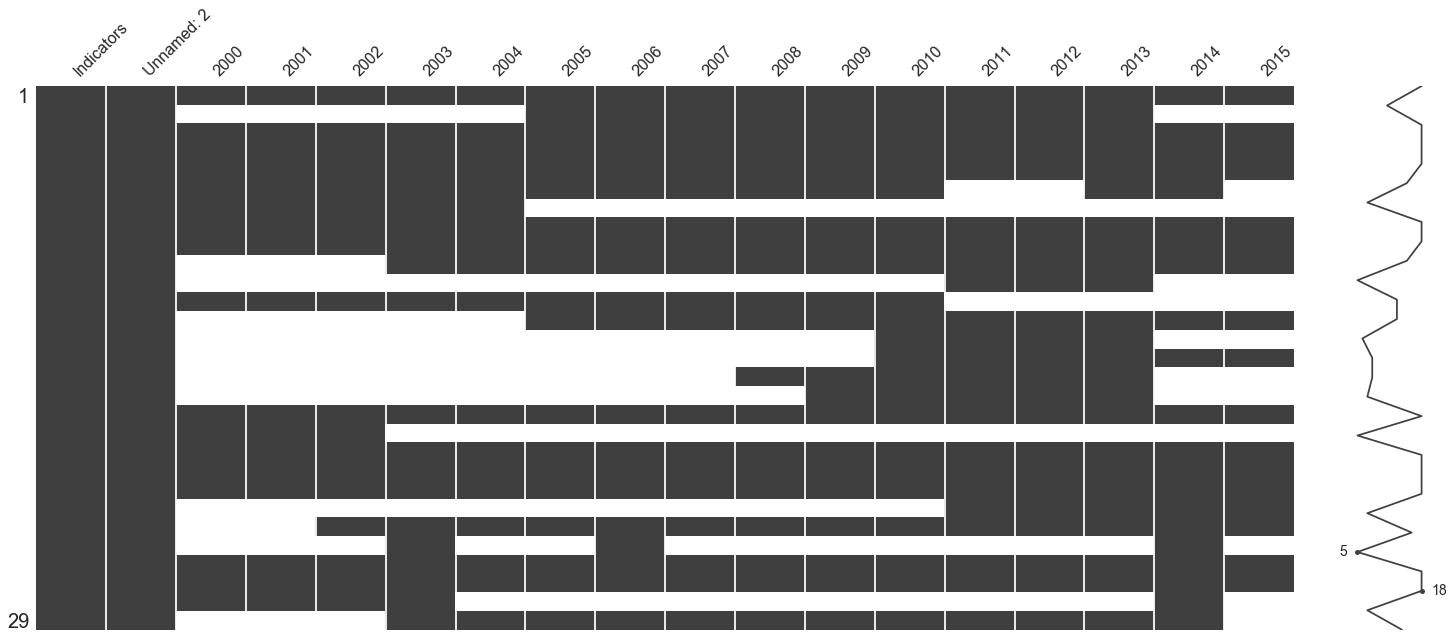

In [45]:
#Show the data in order to explore in what most recent year, most countries are available. 
msno.matrix(cap_exp_data.sample(len(cap_exp_data)))
#2013 is most recent with most available data. 
plt.show()

# 4. Relations between variables
To find (cor)relations between the different variables in the data, we look at some significant variables and check their correlations. We will check for relations and correlations only in the poorest and richest 20 countries. However, paragraph 4.1 shows that the selection of countries is reprensative for the full data set.

In the following subchapters are the relations between the variables described per relation. First, we plot the data in a scatter plot and check for correlation by looking at the graphs. Second, we will perform the Spearman's test to check how strong the correlation is. Afterwards, regression lines will be plotted over the scatter plots of the two variables. 

 

## 4.1 Distribution of full and selected datasets
In the subplots below are the scatter plots of the full data and the selected data in one big plot

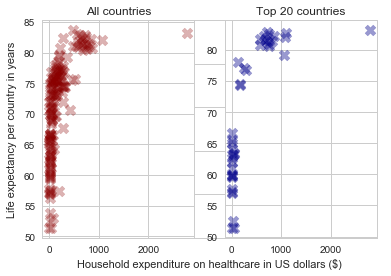

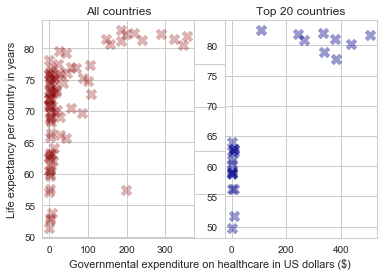

In [74]:
house_full = house_money
house_full = house_full.drop(["Indicators","Unnamed: 2"], axis = 1).T
hfm = house_full.mean(axis=0) #take average of 2000-2015, not used since curve is the same
hfp = house_full.loc["2015"] #latest hf
lf_total = pd.DataFrame()
for Country in life_exp["Entity"].unique():
    lf_country = life_exp[life_exp["Entity"]==Country]
    years = lf_country["Year"].values
    lf_country = lf_country.set_index(years)
    lf_country = lf_country.iloc[:,3:]
    lf_country.columns = [Country]
    if lf_total.empty:
        lf_total = lf_country
    else: 
        lf_total = pd.merge(lf_total, lf_country, left_index=True, right_index=True)
life_full = lf_total[50:]
lfm = life_full.mean(axis=0) #take average of 2000-2015
lfp = life_full.loc[2015]
lfm = lfm.reindex(hfm.index) #match country labels from both datasets
lfp = lfp.reindex(hfp.index)
#make 2 graphs
fig = plt.figure()
ax = fig.add_subplot(111)    # The big subplot
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
# Turn off axis lines and ticks of the big subplot
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
ax.set_xlabel('Household expenditure on healthcare in US dollars ($)')
ax.set_ylabel('Life expectancy per country in years')
ax1.set_title('All countries')
ax2.set_title('Top 20 countries')
ax1.scatter(hfp,lfp,color="darkred", alpha = 0.3, s=120, marker = "X")
ax2.scatter(household_15, life_exp_15,color="darkblue", alpha = 0.4, s=120, marker = "X")
plt.show()
#Prepare the data of the capital health expenditure per capita.
#Use the year 2013, since most data is available here (see preperation of the data).
cap_exp_13 = cap_exp_data["2013"].dropna()
cap_exp_13_countries = cap_exp_13.index

#Select the data of life expectanct of 2013 and the 23 countries which have data about capital.
life_exp_13 = life_exp_data.loc[2013]
cap_exp_13_countries = list(cap_exp_13.index)
cap_exp_13_countries[8]="Congo"
cap_exp_13_countries[-1]="United States"

life_exp_13 = life_exp_13[cap_exp_13_countries]

cap_full = cap_exp.drop(["Indicators","Unnamed: 2"], axis = 1).T
cfm = cap_full.mean(axis=0)
cfp = cap_full.loc["2015"]
cfm = cfm.reindex(lfm.index)
cfp = cfp.reindex(lfp.index)
#make 2 graphs
fig = plt.figure()
ax = fig.add_subplot(111)    # The big subplot
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
# Turn off axis lines and ticks of the big subplot
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
ax.set_xlabel('Governmental expenditure on healthcare in US dollars ($)')
ax.set_ylabel('Life expectancy per country in years')
ax1.set_title('All countries')
ax2.set_title('Top 20 countries')
ax1.scatter(cfp,lfp,color="darkred", alpha = 0.3, s=120, marker = "X")
ax2.scatter(cap_exp_13, life_exp_13,color="darkblue", alpha = 0.4, s=120, marker = "X")
plt.show()

## 4.2 Relation between out-of-pocket money spent on healthcare and life expectancy
First, we check if there is a relation between out-of-pocket money spent on healthcare and the life expectancy. Spending more money on healthcare might lead to better health and a longer life expectancy, but this doesn't mean that all money spent on healthcare is determined solely by the amount of out-of-pocket money spent. To check the relation, a plot is made.

Since the latest data available in the out-of-pocket money database is the data retrieved in 2015, we will examine the relation between the average out-of-pocket money spent on healthcare per household and the life expectancy per country in the same year. The out-of-pocket money spent on healthcare will be in US Dollars. 

Australia's latest out-of-pocket money spent on healthcare per household is from 2014, so we will assume that it was the same in 2015. This will be done by transposing the data from 2014 to 2015.

In [15]:
#Prepare the data of out-of-pocket money spend on healthcare per household over 2015
household_15 = household_data.loc["2015"]
household_15["Australia"] =household_data.loc["2014"]["Australia"]

#Select the data of life expectancy over 2015
life_exp_15 = life_exp_data.loc[2015]

Now we create a scatter plot of the 2015 data to see if the data is scattered, and how it is scattered.

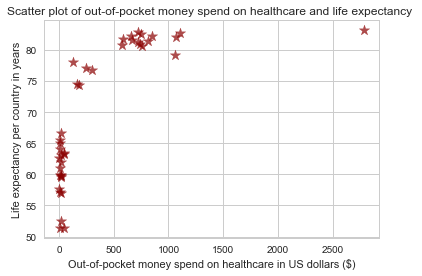

In [90]:
plt.scatter(household_15, life_exp_15, color="darkred", alpha = 0.7, s=120, marker = "*")
plt.xlabel("Out-of-pocket money spend on healthcare in US dollars ($)")
plt.ylabel("Life expectancy per country in years")
plt.title("Scatter plot of out-of-pocket money spend on healthcare and life expectancy ")
plt.show()

In order to test if the two variables are correlated, we use the Spearman's Rank-Order Correlation. We use the Spearman's test over Pearson's, since the relation is probably not linear as can be seen above in the scatter plot. This method tests whether the two variables are correlated, till what extent they are correlated and what the chance is that an uncorrelated data set has the same value (Laerd statistics,2018). A correlations coefficient of 0 implies no correlation between the variables and a coefficient of -1 or 1 implies a monotonic relationships. A monotonic relationship means that if one variable increases the other variable also increases or if one variable increases the other variable decreases. 

In [18]:
scipy.stats.spearmanr(household_15, life_exp_15)

SpearmanrResult(correlation=0.8332082551594747, pvalue=2.54750524739707e-11)

The test show that there is a strong correlation between the two variables accoring to the Spearmans test. The p-value is also very low, meaning that the chance of an uncorrelated giving the same result is very small. We can therefore conclude that if one of the variable increases, the other variable also increases and they are correlated. Therefore we can draw a regression line between the two variables. 

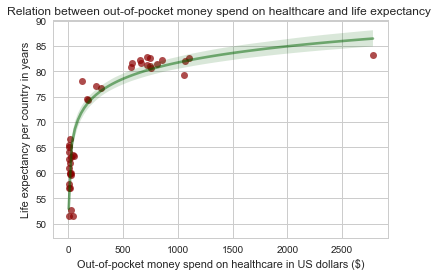

In [91]:
sns.set(style = "whitegrid")
sns.regplot(x=household_15,y=life_exp_15, logx = True, truncate = True, 
            scatter_kws={"color":"darkred","alpha":"0.7"}, line_kws={ "color":"darkgreen", "alpha":0.5})
plt.xlabel("Out-of-pocket money spend on healthcare in US dollars ($)")
plt.ylabel("Life expectancy per country in years")
plt.title("Relation between out-of-pocket money spend on healthcare and life expectancy ")
plt.show()

When using a logarithmic y-scale, the correlation between life expectancy and money spend is more clear to see.

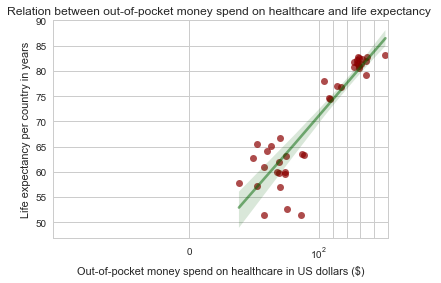

In [92]:
sns.set(style = "whitegrid")
sns.regplot(x=household_15,y=life_exp_15, logx = True, truncate = True, 
            scatter_kws={"color":"darkred","alpha":"0.7"}, line_kws={ "color":"darkgreen", "alpha":0.5})
plt.xlabel("Out-of-pocket money spend on healthcare in US dollars ($)")
plt.ylabel("Life expectancy per country in years")
plt.xscale("symlog")
plt.xticks([0,100,200,400,800,1600,3200])
plt.title("Relation between out-of-pocket money spend on healthcare and life expectancy ")
plt.show()
#TODO: Fix somehow that the left part of the graph behaves.

## 4.3 Relation between capital expensure on healthcare and life expectancy

In [21]:
#Prepare the data of the capital health expenditure per capita.
#Use the year 2013, since most data is available here (see preperation of the data).
cap_exp_13 = cap_exp_data["2013"].dropna()
cap_exp_13_countries = cap_exp_13.index

#Select the data of life expectanct of 2013 and the 23 countries which have data about capital.
life_exp_13 = life_exp_data.loc[2013]
cap_exp_13_countries = list(cap_exp_13.index)
cap_exp_13_countries[8]="Congo"
cap_exp_13_countries[-1]="United States"

life_exp_13 = life_exp_13[cap_exp_13_countries]

We first plot a scatterplot of the data again to scan the data and see what kind of relation it can be.

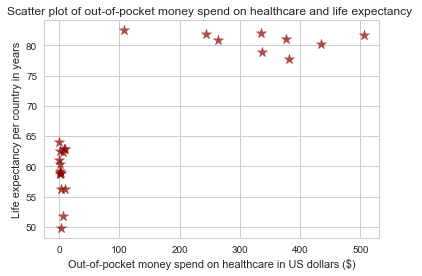

In [94]:
plt.scatter(cap_exp_13, life_exp_13, color="darkred", alpha = 0.7, s=120, marker = "*")
plt.xlabel("Out-of-pocket money spend on healthcare in US dollars ($)")
plt.ylabel("Life expectancy per country in years")
plt.title("Scatter plot of out-of-pocket money spend on healthcare and life expectancy ")
plt.show()

As we tested with the household variable, we again test the capital expenses and life expectancy to check if they are correlated. We again use Spearman's test for the same reason. Again, a correlations coefficient of 0 implies no correlation between the variables and a coefficient of -1 or 1 implies a monotonic relationships. A monotonic relationship means that if one variable increases the other variable also increases or if one variable increases the other variable decreases. 

In [23]:
scipy.stats.spearmanr(cap_exp_13, life_exp_13)

SpearmanrResult(correlation=0.6356521739130434, pvalue=0.0008436669168882472)

This time Spearman's test give a lower correlation and higher p-value, meaning that it is less certain that if one variable increases the other variable also increases. However, above 0.63 is still a decent correlation between the two variables and the chance of an uncorrelated variable having the same correlation (p-value) is still very low. We can therefore conclude that the variables are correlated according to Spearman's test. 

Just like the relation between the out of pocket money spend on healthcare and life expectancy, looks like this correlation is logarithmical as well. 

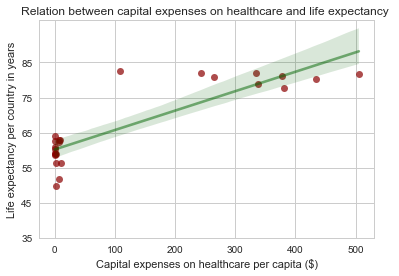

In [96]:
sns.set(style = "whitegrid")
sns.regplot(x=cap_exp_13,y=life_exp_13, truncate = True, 
            scatter_kws={"color":"darkred","alpha":"0.7"}, line_kws={ "color":"darkgreen", "alpha":0.5})
plt.xlabel("Capital expenses on healthcare per capita ($)")
plt.yticks(np.arange(35,90,10))
plt.ylabel("Life expectancy per country in years")
plt.title("Relation between capital expenses on healthcare and life expectancy ")
plt.show()

## 4.4 Sum of expenditures on health care
Below is the sum of the two expenditures plotted. The graphs show that the relation between the sum of the expenditure and the life expectancy also have a logarithmic relation. Both varaibles are plotted for the year 2013. 

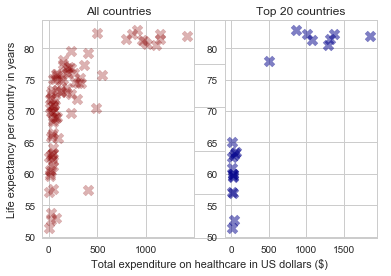

In [102]:
#Total expenditure on healthcare by adding household money and government spending.
household_13 = household_data.loc["2013"]

tfm = cfm + hfm
tfp = cfp + hfp
ttt = cap_exp_13 + household_13
ltt = lfp
ltt = ltt.reindex(ttt.index)

#make 2 graphs
fig = plt.figure()
ax = fig.add_subplot(111)    # The big subplot
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
# Turn off axis lines and ticks of the big subplot
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
ax.set_xlabel('Total expenditure on healthcare in US dollars ($)')
ax.set_ylabel('Life expectancy per country in years')
ax1.set_title('All countries')
ax2.set_title('Top 20 countries')
ax1.scatter(tfp,lfp,color="darkred", alpha = 0.3, s=120, marker = "X")
ax2.scatter(ttt,ltt,color="darkblue", alpha = 0.5, s=120, marker = "X")
plt.show()


## 4.5 Relation between GDP and life expectancy
Since the database provided the most recent data about life expectancy, we will use the GDP data of 2015 as well. 

In [25]:
GDP_15 = GDP_data.loc["2015"]

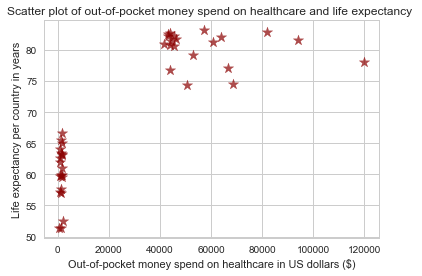

In [98]:
plt.scatter(GDP_15, life_exp_15, color="darkred", alpha = 0.7, s=120, marker = "*")
plt.xlabel("Out-of-pocket money spend on healthcare in US dollars ($)")
plt.ylabel("Life expectancy per country in years")
plt.title("Scatter plot of out-of-pocket money spend on healthcare and life expectancy ")
plt.show()

As we tested twice above, we again test the capital expenses and life expectancy to check if they are correlated. We again use Spearman's test for the same reason. Again, a correlations coefficient of 0 implies no correlation between the variables and a coefficient of -1 or 1 implies a monotonic relationships. A monotonic relationship means that if one variable increases the other variable also increases or if one variable increases the other variable decreases. 

In [27]:
scipy.stats.spearmanr(GDP_15, life_exp_15)

SpearmanrResult(correlation=0.7592870544090057, pvalue=1.3521251374323438e-08)

With these variables the correlation of the variables is a bit less than life expectancy and household expenses, but higher than capital expenses. The correlation of 0.76 is a good correlation between the variables and the p-values is also very small, meaning that the chance of an uncorrelated variable having the same correlation is very small. We can conclude that the variables are correlated according to Spearman's test, therefore we can create a regression line with the two variables. 

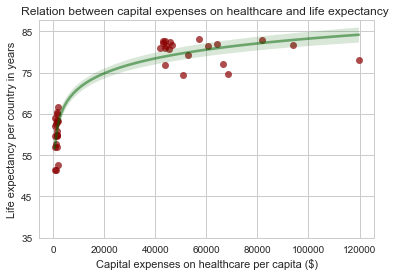

In [99]:
sns.regplot(x=GDP_15,y=life_exp_15,logx = True, truncate = True, 
            scatter_kws={"color":"darkred","alpha":"0.7", "marker":"*"}, line_kws={ "color":"darkgreen", "alpha":0.5})
plt.xlabel("Capital expenses on healthcare per capita ($)")
plt.yticks(np.arange(35,90,10))
plt.ylabel("Life expectancy per country in years")
plt.title("Relation between capital expenses on healthcare and life expectancy ")
plt.show()

When plotting the correlation curve on a logarithmic scale, a clear correlation is shown.

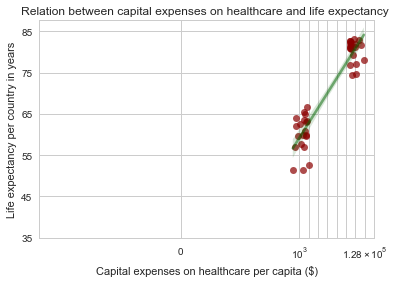

In [100]:
sns.regplot(x=GDP_15,y=life_exp_15,logx = True, truncate = True, 
            scatter_kws={"color":"darkred","alpha":"0.7", "marker":"*"}, line_kws={ "color":"darkgreen", "alpha":0.5})
plt.xlabel("Capital expenses on healthcare per capita ($)")
plt.yticks(np.arange(35,90,10))
plt.ylabel("Life expectancy per country in years")
plt.title("Relation between capital expenses on healthcare and life expectancy ")
plt.xscale("symlog")
plt.xticks([0,1000,2000,4000,8000,16000,32000,64000,128000,256000])
plt.show()

# 5. Prediction of the variables

In this chapter only 3 variables will be predicted: The household expenses on health care per capita, the life expectancy per country and the GDP per country. The capital expenses by governmetns per capita will not be predicted, since only a limited amount of data is available. Due to too many missing values it will be hard to predict plausible values. 

Below is a standard function build in order to predict the data for a given amount of years. 
Based on the information of 2000 till 2015 the polyfit function will estimate coefficients of a polynom that fits the existing data. Based on this polynom the function will predict values for the following years.

The function has 3 required input variables. First, the dataframe on which the prediction is based. Second, the amount of years to predict. Third, the degrees of freedom with as default 1. Then the function will create the years of the existing data, to make sure that the index are integers. The output data is on the next line created as a empty dataframe. 

In [30]:
def predict(input_data, pred_years, degree = 1):
    years = np.arange(2000,2016,1)
    out_data_name = pd.DataFrame()
    for Country in input_data.columns:
        new_country = input_data[Country]
        coeff_poly = np.polyfit(years, new_country,degree)
        for i in np.arange(1, pred_years+1,1):
            pred = np.polyval(coeff_poly, years[-1]+i)
            new_country = new_country.append(pd.Series([pred], index=[years[-1]+i], name=Country))
        out_data_name[Country]= new_country
    return (out_data_name)

## 5.1 Prediction of household expenses and Life expectancy
Before we can use the function that is defined above, we need to fill the gaps of the data. If these missing values are not filled, the polynom will behave strange giving very high or low numbers. 

In [31]:
#Modify the data in order to withhold the prediction to crash, by replacing missing numbers with closest year. 
household_pred_data = household_data
household_pred_data.iloc[0]["Afghanistan"]=household_pred_data.iloc[2]["Afghanistan"]
household_pred_data.iloc[1]["Afghanistan"]=household_pred_data.iloc[2]["Afghanistan"]
household_pred_data.iloc[15]["Australia"]=household_pred_data.iloc[14]["Australia"]
household_pred_data.iloc[0]["Belgium"]=household_pred_data.iloc[3]["Belgium"]
household_pred_data.iloc[1]["Belgium"]=household_pred_data.iloc[3]["Belgium"]
household_pred_data.iloc[2]["Belgium"]=household_pred_data.iloc[3]["Belgium"]

HH_pred = predict(household_pred_data,10,1)
HH_pred.head()

,Afghanistan,Australia,Austria,Bahrain,Belgium,Burkina Faso,Burundi,Canada,Central African Republic,Chad,...,Rwanda,Saudi Arabia,Sierra Leone,Singapore,Sweden,Switzerland,Togo,Uganda,United Arab Emirates,United States of America
2000,13.873145,342.762120,403.404231,106.291816,577.214388,3.172817,4.197771,331.877442,4.832313,5.764260,...,2.450067,70.967918,8.082079,395.402906,314.297672,1167.607637,7.404805,7.096708,172.651978,705.592737
2001,13.873145,318.475054,421.051522,110.685341,577.214388,3.293572,3.719912,327.185044,4.694655,6.886266,...,2.196349,69.546957,14.878924,392.871779,371.557688,1191.626889,7.271176,6.967621,116.415650,724.132942
2002,13.873145,351.338568,462.750230,114.785111,577.214388,3.335261,3.438550,342.170373,4.943164,11.756481,...,2.051486,67.864775,16.320056,399.372034,417.052476,1322.578344,8.077396,7.085112,238.619640,762.813137
2003,15.054136,429.094207,582.576100,118.434858,577.214388,3.922435,3.103091,389.144923,5.939127,8.647954,...,2.922966,68.332341,17.081300,401.652125,513.431022,1581.824433,9.668791,6.714104,241.454572,812.505363
2004,17.689163,529.975019,660.604845,121.465464,607.799246,5.360952,3.357498,445.396005,6.549299,14.436606,...,4.292764,72.461491,16.521031,422.971015,588.436976,1774.730135,10.195482,10.706004,270.726932,849.386662


The figure below shows that the degree of freedom of the polynom should be 1, since the graphs will become slightly negative over 10 years of prediction with 2 degrees of freedom and will become extremely positive and negative with higher degrees. The household expenses per capita on health care is unlikely to become 0 or even less than 0, therefore the degree of freedom is set to 0. 

The prediction with 1 degree of freedom is also questionable, since it shows a dip in the first predicted years and some country's increase is unplausible. However, for now we accept the results and will compare it to the other variables. 

Since the data is divided into two groups, we plot the two groups below to further explore the data. 

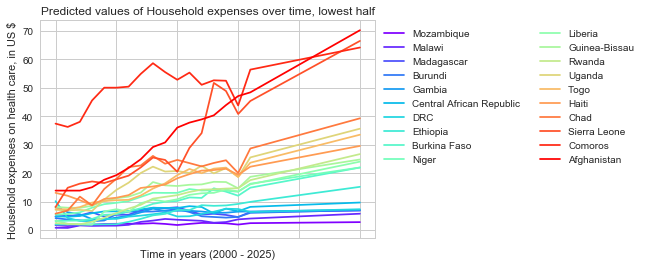

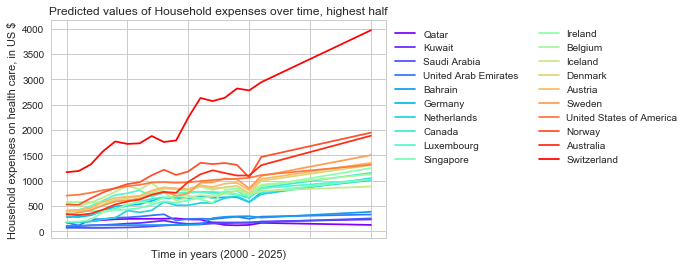

In [33]:
lowest_HH_pred = HH_pred.T[HH_pred.T["2000"]<50].T
highest_HH_pred = HH_pred.T[HH_pred.T["2000"]>50].T
lowest_HH_pred.sort_values(by = "2015", axis=1).plot(linestyle = ("-"),cmap=plt.cm.get_cmap('rainbow'), )
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol = 2)
plt.title("Predicted values of Household expenses over time, lowest half")
plt.xlabel("Time in years (2000 - 2025)")
plt.ylabel("Household expenses on health care, in US $")
highest_HH_pred.sort_values(by = "2015", axis=1).plot(linestyle = ("-"),cmap=plt.cm.get_cmap('rainbow'), )
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol = 2)
plt.title("Predicted values of Household expenses over time, highest half")
plt.xlabel("Time in years (2000 - 2025)")
plt.ylabel("Household expenses on health care, in US $")
plt.show()

Both plots show similar behaviour of the graphs. Despite of the start value no mayor deviations. 

## 5.2 Prediction of the life expectancy
Below is the prediction of life expectancy estimated with the predict function. Sicne the data is complete are no adjustments necessarry. 

In [34]:
#Predicting the life expectancy based on the last 15 years. 
LE_pred = predict(life_exp_data,10,1)    

LE_pred.head()
#LE_pred["Netherlands"]

,Afghanistan,Australia,Austria,Bahrain,Belgium,Burkina Faso,Burundi,Canada,Central African Republic,Chad,...,Rwanda,Saudi Arabia,Sierra Leone,Singapore,Sweden,Switzerland,Togo,Uganda,United Arab Emirates,United States
2000,55.481998,79.589996,78.238998,74.440002,77.866997,50.488998,51.544998,79.113998,43.937000,47.592999,...,48.415001,72.440002,38.702000,78.338997,79.724998,79.858002,53.488998,47.077000,74.238998,76.815002
2001,56.043999,79.885002,78.517998,74.635002,78.070999,50.893002,51.778999,79.337997,43.755001,47.603001,...,49.792999,72.651001,39.660000,78.664001,79.893997,80.117996,53.550999,48.119999,74.487000,76.962997
2002,56.637001,80.175003,78.791000,74.821999,78.285004,51.383999,51.977001,79.565002,43.717999,47.638000,...,50.970001,72.820000,40.660000,79.028999,80.061996,80.377998,53.707001,49.242001,74.730003,77.121002
2003,57.250000,80.452003,79.058998,74.999001,78.509003,51.956001,52.189999,79.791000,43.827000,47.716000,...,52.268002,72.947998,41.668999,79.419998,80.235001,80.640999,53.935001,50.394001,74.968002,77.292000
2004,57.875000,80.712997,79.318001,75.167000,78.739998,52.602001,52.437000,80.013000,44.080002,47.848000,...,53.755001,73.041000,42.660000,79.824997,80.413002,80.903999,54.230000,51.537998,75.199997,77.474998


The further explore the data we again plot the graphs of all countries. Again the prediction is made with 1 degree of freedom, since this predicts the most realistic outcomes. 2 degrees of freedom generates reasonable outcomes as well, but more degrees will give extreme values. 

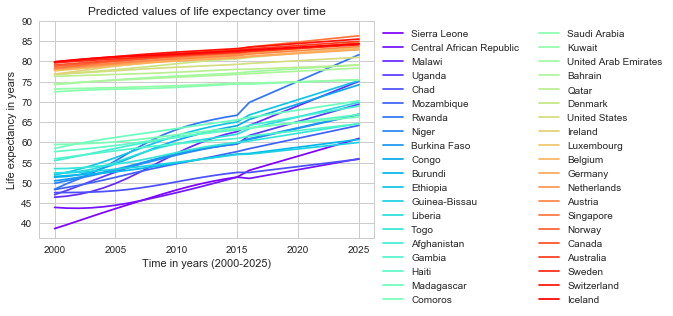

In [35]:
LE_pred.sort_values(by = 2000, axis=1).plot(linestyle = ("-"),cmap=plt.cm.get_cmap('rainbow'))
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol = 2)
plt.title("Predicted values of life expectancy over time")
plt.xlabel("Time in years (2000-2025)")
plt.ylabel("Life expectancy in years")
plt.yticks(np.arange(40,95,5))
plt.show()

In comparison to the household expenses on health care, seems the life expectancy to be predicted more realistic. The prediciton of the Netherlands in the prediction above is slightly higher than predictions of other more detailed models. For example the prediction of Statista in 2018 where they predict an average life expectancy of 83,23 year, compared to 84,4 years in our model.

In order to explore the graphs in more detail, the data set will again be splitted in two groups. 

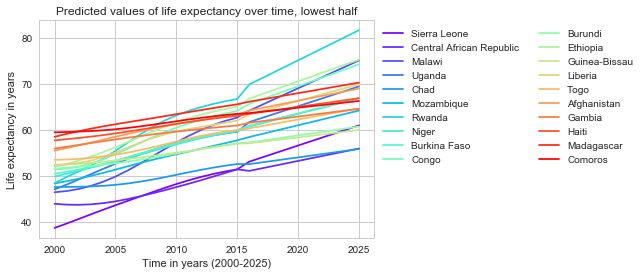

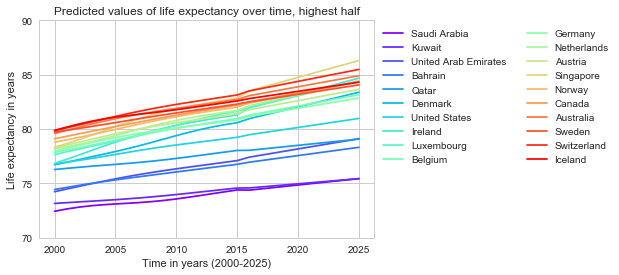

In [36]:
lowest_LE_pred = LE_pred.T[LE_pred.T[2000]<70].T
lowest_LE_pred.sort_values(by = 2000, axis=1).plot(linestyle = ("-"),cmap=plt.cm.get_cmap('rainbow'))
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol = 2)
plt.title("Predicted values of life expectancy over time, lowest half")
plt.xlabel("Time in years (2000-2025)")
plt.ylabel("Life expectancy in years")

highest_LE_pred = LE_pred.T[LE_pred.T[2000]>70].T
highest_LE_pred.sort_values(by = 2000, axis=1).plot(linestyle = ("-"),cmap=plt.cm.get_cmap('rainbow'))
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol = 2)
plt.title("Predicted values of life expectancy over time, highest half")
plt.xlabel("Time in years (2000-2025)")
plt.ylabel("Life expectancy in years")
plt.yticks(np.arange(70,95,5))
plt.show()

Again both plots show similar behaviour. However, obvious is that for the lowest half of the countries their life expectancy grows a lot quicker. 

## 5.3 Prediction of the life expectancy
Below is the prediction of GDP estimated with the predict function. 
First we have to fill the missing values with values of the most recent years in order to be able to fit a good polynom. Second, we only predict data based on the values of 2000 untill 2015 to do the same prediction as with the previous data. 

In [37]:
GDP_data.iloc[0]["Afghanistan"]=GDP_data.iloc[2]["Afghanistan"]
GDP_data.iloc[1]["Afghanistan"]=GDP_data.iloc[2]["Afghanistan"]

GDP_pred = predict(GDP_data[:16], 10,1)
GDP_pred.head()

,Afghanistan,Australia,Austria,Bahrain,Belgium,Burkina Faso,Burundi,Canada,Central African Republic,Chad,...,Rwanda,Saudi Arabia,Sierra Leone,Singapore,Sweden,Switzerland,Togo,Uganda,United Arab Emirates,United States
2000,1063.635574,35377.729552,38844.404714,44942.369023,37188.643693,1075.395337,754.096280,37431.916978,813.041558,993.182982,...,792.923578,43071.449832,912.742558,51706.434823,36854.868762,50775.976339,1276.990341,1049.778625,102634.924268,45986.052710
2001,1063.635574,35578.642071,39186.337002,43887.071192,37361.718438,1114.202253,751.388913,37712.128235,832.227925,1067.947758,...,828.835614,41472.853344,823.286273,49851.079273,37330.704974,51117.887441,1221.466431,1067.961203,98716.970421,45977.549991
2002,1063.635574,36553.964614,39638.026874,43147.496378,37856.864713,1129.740538,763.177201,38500.317077,845.684657,1115.037497,...,915.447814,39194.772390,994.992436,51478.685107,37980.980052,50815.153156,1178.008315,1122.249626,95894.914426,46366.577974
2003,1099.194507,37183.684574,39816.774123,43187.499185,37990.713309,1183.094880,730.902951,38805.671114,785.159427,1231.115101,...,920.073174,42344.410918,1036.965340,54560.544506,38742.680261,50459.502906,1204.282612,1154.200711,97790.177403,47260.041937
2004,1062.249360,38225.693714,40652.810702,43355.305653,39201.527156,1200.417062,741.766252,39604.354861,817.170646,1584.673150,...,973.116345,44390.957626,1056.584409,59027.012627,40257.923532,51505.092367,1197.983399,1190.574441,98076.533161,48597.337362


Again we plot all graphs of the different countries, in order to visualise the data. As before we will use only 1 degree of freedom, since more will give extreme values for the graph. 

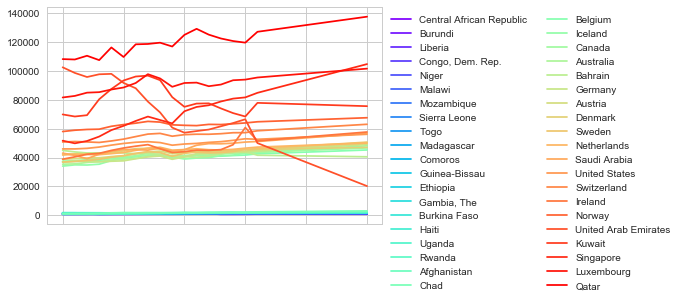

In [38]:
GDP_pred.sort_values(by = "2015", axis=1).plot(linestyle = ("-"),cmap=plt.cm.get_cmap('rainbow'))
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol = 2)
plt.show()

The graph shows an extreme difference in GDP, for the normal values as wel as in the predicted values. The plot also shows strange unplausible behaviour of the predicted GDP. However, for this anaysis we will assume that the values are plausible. 

## 5.4 Checking relations of predictions
In the plot below are the data and the predicted data plotted in 1 plot. This gives an indication of how realistic the predictions are comapred to the real data. The original data is, as above, plotted in green and red and the predicted data in yellow and black. 

### 5.4.1 Household and life expectancy predictions
Remarkable about the graph below is at first sight how well it fits in the same graph. Moreover, the life expactancy of the countries with low household expenses on healthcare are predicted to have a higher life expectancy with similar expenses. The countries where households already spend more on healthcare are on the other hand predicted to live longer and spend more on health care per household. 

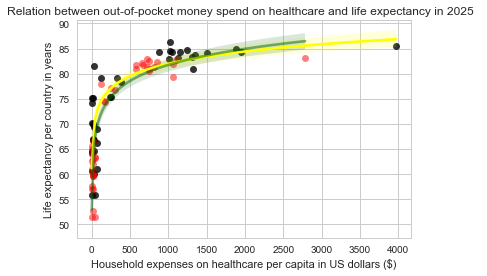

In [106]:
sns.set(style = "whitegrid")
sns.regplot(x=HH_pred.loc[2025],y=LE_pred.loc[2025],logx = True, truncate = True, 
            scatter_kws={"color":"black"}, line_kws={ "color":"Yellow"})
sns.regplot(x=household_15,y=life_exp_15, logx = True, truncate = True, 
            scatter_kws={"color":"red","alpha":"0.5"}, line_kws={ "color":"darkgreen","alpha":0.5})
plt.xlabel("Household expenses on healthcare per capita in US dollars ($)")
plt.ylabel("Life expectancy per country in years")
plt.title("Relation between out-of-pocket money spend on healthcare and life expectancy in 2025  ")
plt.show()

Concluded, the predicted variables have the same relation as the normal variables. 

### 5.4.2 GDP and life expectancy predictions
Unlike the above graph, is the graph of the GDP and life expectancy prediction more different from the normal data. However, the graphs both show the same behaviour. The predictions are only slightly higher than the data, which is not abnormally since both variables increase over time. 

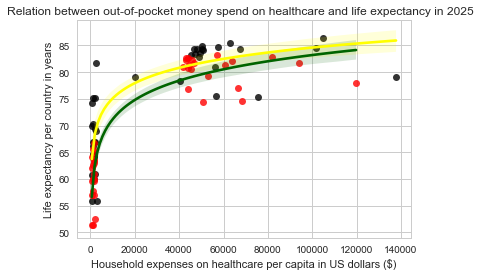

In [40]:
sns.set(style = "whitegrid")
sns.regplot(x=GDP_pred.loc[2025],y=LE_pred.loc[2025],logx = True, truncate = True, 
            scatter_kws={"color":"black"}, line_kws={ "color":"Yellow"})
sns.regplot(x=GDP_data.loc["2015"],y=life_exp_15, logx = True, truncate = True, 
            scatter_kws={"color":"red"}, line_kws={ "color":"darkgreen"})
plt.xlabel("Household expenses on healthcare per capita in US dollars ($)")
plt.ylabel("Life expectancy per country in years")
plt.title("Relation between out-of-pocket money spend on healthcare and life expectancy in 2025  ")
plt.show()

Concluded, the predicted variables have also the same relation as the normal variables. 

# 6. Conclusion
After preparing the data for transformation and transforming the data, the relations of the variables are described in chapter four. Subchapter 4.2 shows how the household out-of-pocket expenses on health care per capita correlate with the life expectancy in 2015. There is a logarithmic relation between the variables. This means that households with low life expectancy and low household expenses on health care can increase their life expectancy rapidly if they could spend around 200 US dollar on health care. Above approximately 200 US dollar the life expectancy increases significantly slower and stagnates. 

Subchapter 4.3 describes the relation between healthcare spending by governments and the life expectancy per country in 2013. At first sight, the relation seems to be a logarithmic function, similar to the relation between household expenses on health care and life expectancy. However, when the x-axis is changed to a logarithmic scale, the plot showed that the relation is not completely logarithmic. The plots show that governments can easily improve the life expectancy of its citizens if they could spend more on health care per capita. 

In subchapter 4.4 is described what the relation is of the sums of the expenditures and the life expectancy. The outcome of the graph show that the relation is similar to the relation of the household expenditure, logarithmical. 

Closing chapter 4, descibes subchaper 4.5 the relation between GDP and life expectancy. Similar to the first relation in subchapter 4.1 shows this relation a logarithmic relation between GDP and life expectancy. This also means that countries with low GDP and low life expectancy would rapidly increase their life expectancy if their GDP would grow. This rapid grow would continu till the turning-point, after which the life expectancy will slowly increase when the GDP increases. 

Chapter 5 shows the prediction of three of the variables and two of the relations, since the governmental expenditure on health care has too limited data to predict on. The household expenditure on health care and the GDPs of the country show strange behaviour when predited based on historical data, only the life expectancy shows plausible results when predicted. The predictions of the relations between household expenditure and life expectancy and the relation between GDP and life expectancy show on the other hand similar behaviour to the historical data. 

To anwser the main research question "What is the relation between life expectancy and healthcare spending?", we can conclude that the expenses on health care have a logarithmical relation with the life expenditure. Countries with low expenditure on health care have a low life expectancy. When countries have a slightly higher expenditure on health care their life expectancy increases rapidly, untill the age of 65 where the life expectancy growth slows down. Around the age of 75 and the expenditure around 250 dollar per capita the growth stagnates untill the age  is a little more than 85 and the expenditure is 2500 dollar per capita. The prediction of the household expenditure shows the same behaviour as the historical data. 




### Reference
- Guterres, A. (2018) The sustainable development goals report. United Nations. 
- Laerd statistics (2018) Spearman's Rank-Order Correlation. Retrieved on 01-11-2018 from: https://statistics.laerd.com/statistical-guides/spearmans-rank-order-correlation-statistical-guide.php
- Statista (2018) Forecast of the life expectancy at birth in the Netherlands from 2015 to 2060 (in years). Retrieved on 01-11-2018 from https://www.statista.com/statistics/523696/netherlands-life-expectancy-at-birth-forecast-2015-2060/
